In [1]:
from jax import random, jit, vmap
from functions.simulation import get_dataset, get_epsilon_star
from functions.training import train_loop
from functions.SBC import SBC_epsilon, plot_SBC
import jax.numpy as jnp
import time
import pickle 
import lzma
from jax.scipy.stats import norm


@jit
def prior_simulator(key):
    return random.normal(key, (1,))*SIGMA0 + MU0

@jit
def data_simulator(key, theta):
    return (random.normal(key, (N_DATA,))*SIGMA + theta).astype(float)

@jit
def discrepancy(y, y_true):
    return (jnp.mean(y) - jnp.mean(y_true))**2


In [ ]:
key = random.PRNGKey(0)
 
MU0 = 0.
SIGMA = 1.
MODEL_ARGS = [SIGMA]
N_DATA = 100
N_POINTS_TRAIN = 1000000
N_POINTS_TEST = 100000
N_POINTS_EPS = 10000
sim_args = None
N_EPOCHS = 100
LEARNING_RATE = 0.001
PATIENCE = 7
COOLDOWN = 0
FACTOR = .5
RTOL = 1e-4  
ACCUMULATION_SIZE = 200
LEARNING_RATE_MIN = 1e-6
BATCH_SIZE = 256
NUM_BATCH = 1024
NUM_CLASSES = 2
HIDDEN_SIZE = 256
NUM_LAYERS = 7
WDECAY = .001
N_GRID_FINAL = 10000
N_GRID_EXPLO = 1000
MINN, MAXX = -50.,50. 
L = 127
N_SBC = (L+1)*20



SIGMA0 = 10.0




--------------------
SIGMA0 = 5.0, TRUE_MU = 0.5, ACCEPT_RATE = 1.0
--------------------


Selection of epsilon star...
Distances: min =  5.0774634e-07 max =  351.43564 mean =  25.633043 std =  35.61118
Time to select epsilon star: 0.74s

Simulations of the testing dataset...
Time to simulate the testing dataset: 0.82s

Simulations of the training dataset...
Time to simulate the training dataset: 1.59s

Training the neural network...
Initial accuracy: 50.31%, Initial test accuracy: 50.28%
Training for 100 epochs...
Epoch 1/100, mean train accuracy: 93.18%, mean test accuracy: 95.84%, lr scale: 1.0 in 8.70 sec
Epoch 2/100, mean train accuracy: 89.55%, mean test accuracy: 89.57%, lr scale: 1.0 in 7.94 sec
Epoch 3/100, mean train accuracy: 95.59%, mean test accuracy: 97.60%, lr scale: 1.0 in 7.95 sec
Epoch 4/100, mean train accuracy: 96.27%, mean test accuracy: 97.31%, lr scale: 1.0 in 7.90 sec
Epoch 5/100, mean train accuracy: 82.19%, mean test accuracy: 97.03%, lr scale: 1.0 in 8.02 s

  0%|          | 0/2560 [00:00<?, ?it/s]

Time to perform SBC: 154.23s

Data saved in  ./new_new_pickle/Gaussian_notsort_meandist/Gaussian_notsort_meandist_sigma_1.0_sigma0_5.0_mu_0.5_acc_1.0_eps_inf.xz


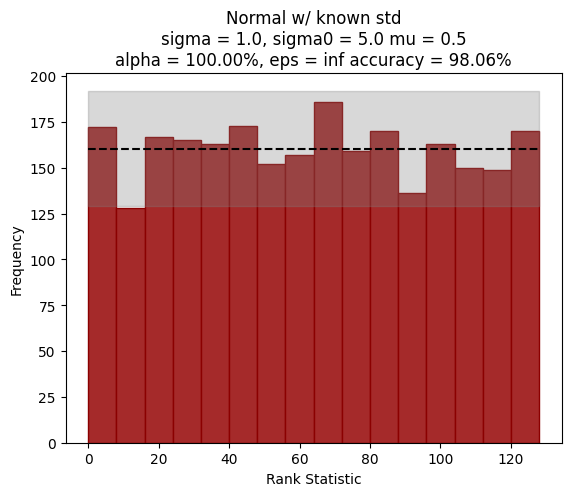

Plot saved in  ./new_new_fig/Gaussian_notsort_meandist/Gaussian_notsort_meandist_sigma_1.0_sigma0_5.0_mu_0.5_acc_1.0_eps_inf.png


--------------------
ITERATION (ACC = 1.0) DONE IN 370.33327531814575 SECONDS!
--------------------




--------------------
SIGMA0 = 5.0, TRUE_MU = 0.5, ACCEPT_RATE = 0.999
--------------------


Selection of epsilon star...
Distances: min =  3.899477e-08 max =  359.39096 mean =  25.146002 std =  35.12294
epsilon:  162.3310089111328 acceptance rate:  0.9996
epsilon:  136.60726928710938 acceptance rate:  0.99909997
epsilon:  121.49668884277344 acceptance rate:  0.9995
epsilon:  108.10960388183594 acceptance rate:  0.99939996
epsilon:  98.85842895507812 acceptance rate:  0.99829996
Time to select epsilon star: 3.25s

Simulations of the testing dataset...
Time to simulate the testing dataset: 0.95s

Simulations of the training dataset...
Time to simulate the training dataset: 3.74s

Training the neural network...
Initial accuracy: 50.20%, Initial test accurac

KeyboardInterrupt: 

In [2]:
key = random.PRNGKey(0)
 
MU0 = 0.
SIGMA = 1.
MODEL_ARGS = [SIGMA]
N_DATA = 100
N_POINTS_TRAIN = 1000000
N_POINTS_TEST = 100000
N_POINTS_EPS = 10000
sim_args = None
N_EPOCHS = 100
LEARNING_RATE = 0.001
PATIENCE = 7
COOLDOWN = 0
FACTOR = .5
RTOL = 1e-4  
ACCUMULATION_SIZE = 200
LEARNING_RATE_MIN = 1e-6
BATCH_SIZE = 256
NUM_BATCH = 1024
NUM_CLASSES = 2
HIDDEN_SIZE = 256
NUM_LAYERS = 7
WDECAY = .001
N_GRID_FINAL = 10000
N_GRID_EXPLO = 1000
MINN, MAXX = -50.,50. 
L = 127
N_SBC = (L+1)*20



SIGMAS0 = [5*SIGMA, 10*SIGMA, 20*SIGMA]

for SIGMA0 in SIGMAS0:
    TRUE_MUS = [.1*SIGMA0, .5*SIGMA0, SIGMA0, 1.5*SIGMA0]
    PRIOR_ARGS = [MU0, SIGMA0]
    PRIOR_LOGPDF = lambda x: norm.logpdf(x, loc = MU0, scale = SIGMA0)

    for TRUE_MU in TRUE_MUS:
        EPSILON_STAR = jnp.inf
        key, subkey = random.split(key)
        TRUE_DATA = data_simulator(subkey, TRUE_MU)
        for ACCEPT_RATE in [1., .999, .99, .975, .95, .925, .9, .8,.75, .7, .6, .5]:
            print("\n\n--------------------")
            print("SIGMA0 = {}, TRUE_MU = {}, ACCEPT_RATE = {}".format(SIGMA0, TRUE_MU, ACCEPT_RATE))
            print("--------------------\n\n")
                    
            
            time_eps = time.time()
            print("Selection of epsilon star...")
            EPSILON_STAR, key = get_epsilon_star(key, ACCEPT_RATE, N_POINTS_EPS, prior_simulator, data_simulator, discrepancy, TRUE_DATA, quantile_rate = .99, epsilon = EPSILON_STAR)
            print('Time to select epsilon star: {:.2f}s\n'.format(time.time()-time_eps))

            print("Simulations of the testing dataset...")
            time_sim = time.time()
            X_test, y_test, key = get_dataset(key, N_POINTS_TEST, prior_simulator, data_simulator, discrepancy, EPSILON_STAR, TRUE_DATA)
            print('Time to simulate the testing dataset: {:.2f}s\n'.format(time.time()-time_sim))

            # print("Simulations of the training dataset...")
            # time_sim = time.time()
            # X_train, y_train, key = get_dataset(key, N_POINTS_TRAIN, prior_simulator, data_simulator, discrepancy, EPSILON_STAR, TRUE_DATA)
            # print('Time to simulate the training dataset: {:.2f}s\n'.format(time.time()-time_sim))


            print("Training the neural network...")
            time_nn = time.time()
            params, train_accuracy, train_losses, test_accuracy, test_losses, key = train_loop(key, N_EPOCHS, NUM_LAYERS, HIDDEN_SIZE, NUM_CLASSES, BATCH_SIZE, NUM_BATCH, LEARNING_RATE, WDECAY, PATIENCE, COOLDOWN, FACTOR, RTOL, ACCUMULATION_SIZE, LEARNING_RATE_MIN, prior_simulator, data_simulator, discrepancy, true_data = TRUE_DATA, X_train = None, y_train = None, X_test = X_test, y_test =  y_test, N_POINTS_TRAIN = N_POINTS_TRAIN, N_POINTS_TEST = N_POINTS_TEST, epsilon = EPSILON_STAR, verbose = True)
            print('Time to train the neural network: {:.2f}s\n'.format(time.time()-time_nn))


            print("Simulation Based Calibration...")
            time_sbc = time.time()

            ranks, thetas_tilde, thetas, key = SBC_epsilon(key = key, N_SBC = N_SBC, L = L, params = params, epsilon = EPSILON_STAR, true_data = TRUE_DATA, prior_simulator = prior_simulator, prior_logpdf = PRIOR_LOGPDF, data_simulator = data_simulator, discrepancy = discrepancy, n_grid_explo = N_GRID_EXPLO, n_grid_final = N_GRID_FINAL, minn = MINN, maxx = MAXX)

            print('Time to perform SBC: {:.2f}s\n'.format(time.time()-time_sbc))


            pickle_dico = {"ranks": ranks, "thetas_tilde": thetas_tilde, "thetas": thetas, "epsilon":EPSILON_STAR, "KEY":key, "N_SBC":N_SBC, "L":L, "N_GRID_EXPLO": N_GRID_EXPLO, 'N_GRID_FINAL': N_GRID_FINAL,"TRUE_DATA": TRUE_DATA, "TRUE_THETA": TRUE_MU, "params": params, "train_accuracy":train_accuracy, "test_accuracy":test_accuracy, "MODEL_ARGS":MODEL_ARGS, "PRIOR_ARGS":PRIOR_ARGS, "N_POINTS_TRAIN":N_POINTS_TRAIN, "N_POINTS_TEST":N_POINTS_TEST, "N_DATA":N_DATA, "N_EPOCHS":N_EPOCHS, "LEARNING_RATE":LEARNING_RATE, "PATIENCE":PATIENCE, "COOLDOWN":COOLDOWN, "FACTOR":FACTOR, "RTOL":RTOL, "ACCUMULATION_SIZE":ACCUMULATION_SIZE, "LEARNING_RATE_MIN":LEARNING_RATE_MIN, "BATCH_SIZE":BATCH_SIZE, "NUM_BATCH":NUM_BATCH, "NUM_CLASSES":NUM_CLASSES, "HIDDEN_SIZE":HIDDEN_SIZE, "NUM_LAYERS":NUM_LAYERS, "WDECAY":WDECAY}

            name = "./new_new_pickle/Gaussian_notsort_meandist/Gaussian_notsort_meandist_sigma_{}_sigma0_{}_mu_{}_acc_{:.3}_eps_{:.5}.xz".format(SIGMA, SIGMA0, TRUE_MU, ACCEPT_RATE, EPSILON_STAR)

            with lzma.open(name, "wb") as f:
                pickle.dump(pickle_dico, f)
            print("Data saved in ", name)

            title = "Normal w/ known std\nsigma = {}, sigma0 = {} mu = {}\nalpha = {:.2%}, eps = {:.3} accuracy = {:.2%}".format(SIGMA, SIGMA0, TRUE_MU, ACCEPT_RATE, EPSILON_STAR, test_accuracy[-1])

            name_plot = "./new_new_fig/Gaussian_notsort_meandist/Gaussian_notsort_meandist_sigma_{}_sigma0_{}_mu_{}_acc_{:.3}_eps_{:.5}.png".format(SIGMA, SIGMA0, TRUE_MU, ACCEPT_RATE, EPSILON_STAR)
            plot_SBC(ranks, L, B = 16, title = title, save_name = name_plot)
            print("Plot saved in ", name_plot)
            
            print("\n\n--------------------")
            print("ITERATION (ACC = {}) DONE IN {} SECONDS!".format(ACCEPT_RATE, time.time()-time_eps))
            print("--------------------\n\n")

In [18]:
for ACCEPT_RATE in [1., .999, .99, .975, .95, .925, .9, .8,.75, .7, .6, .5]:
    print("\n\n--------------------")
    print("ACCEPT RATE: ", ACCEPT_RATE)
    print("--------------------\n\n")
    
    
    time_eps = time.time()
    print("Selection of epsilon star...")
    EPSILON_STAR, key = get_epsilon_star(key, ACCEPT_RATE, N_POINTS_EPS, prior_simulator, data_simulator, discrepancy, TRUE_DATA, quantile_rate = .99, epsilon = EPSILON_STAR)
    print('Time to select epsilon star: {:.2f}s\n'.format(time.time()-time_eps))

    print("Simulations of the testing dataset...")
    time_sim = time.time()
    X_test, y_test, key = get_dataset(key, N_POINTS_TEST, prior_simulator, data_simulator, discrepancy, EPSILON_STAR, TRUE_DATA)
    print('Time to simulate the testing dataset: {:.2f}s\n'.format(time.time()-time_sim))

    print("Simulations of the training dataset...")
    time_sim = time.time()
    X_train, y_train, key = get_dataset(key, N_POINTS_TRAIN, prior_simulator, data_simulator, discrepancy, EPSILON_STAR, TRUE_DATA)
    print('Time to simulate the training dataset: {:.2f}s\n'.format(time.time()-time_sim))


    print("Training the neural network...")
    time_nn = time.time()
    params, train_accuracy, train_losses, test_accuracy, test_losses, key = train_loop(key, N_EPOCHS, NUM_LAYERS, HIDDEN_SIZE, NUM_CLASSES, BATCH_SIZE, NUM_BATCH, LEARNING_RATE, WDECAY, PATIENCE, COOLDOWN, FACTOR, RTOL, ACCUMULATION_SIZE, LEARNING_RATE_MIN, prior_simulator, data_simulator, discrepancy, true_data = TRUE_DATA, X_train = None, y_train = None, X_test = X_test, y_test =  y_test, N_POINTS_TRAIN = N_POINTS_TRAIN, N_POINTS_TEST = N_POINTS_TEST, epsilon = EPSILON_STAR, verbose = True)
    print('Time to train the neural network: {:.2f}s\n'.format(time.time()-time_nn))


    print("Simulation Based Calibration...")
    time_sbc = time.time()

    ranks, thetas_tilde, thetas, key = SBC_epsilon(key = key, N_SBC = N_SBC, L = L, params = params, epsilon = EPSILON_STAR, true_data = TRUE_DATA, prior_simulator = prior_simulator, prior_logpdf = PRIOR_LOGPDF, data_simulator = data_simulator, discrepancy = discrepancy, n_grid_explo = N_GRID_EXPLO, n_grid_final = N_GRID_FINAL, minn = MINN, maxx = MAXX)

    print('Time to perform SBC: {:.2f}s\n'.format(time.time()-time_sbc))


    pickle_dico = {"ranks": ranks, "thetas_tilde": thetas_tilde, "thetas": thetas, "epsilon":EPSILON_STAR, "KEY":key, "N_SBC":N_SBC, "L":L, "N_GRID_EXPLO": N_GRID_EXPLO, 'N_GRID_FINAL': N_GRID_FINAL,"TRUE_DATA": TRUE_DATA, "TRUE_THETA": TRUE_MU, "params": params, "train_accuracy":train_accuracy, "test_accuracy":test_accuracy, "MODEL_ARGS":MODEL_ARGS, "PRIOR_ARGS":PRIOR_ARGS, "N_POINTS_TRAIN":N_POINTS_TRAIN, "N_POINTS_TEST":N_POINTS_TEST, "N_DATA":N_DATA, "N_EPOCHS":N_EPOCHS, "LEARNING_RATE":LEARNING_RATE, "PATIENCE":PATIENCE, "COOLDOWN":COOLDOWN, "FACTOR":FACTOR, "RTOL":RTOL, "ACCUMULATION_SIZE":ACCUMULATION_SIZE, "LEARNING_RATE_MIN":LEARNING_RATE_MIN, "BATCH_SIZE":BATCH_SIZE, "NUM_BATCH":NUM_BATCH, "NUM_CLASSES":NUM_CLASSES, "HIDDEN_SIZE":HIDDEN_SIZE, "NUM_LAYERS":NUM_LAYERS, "WDECAY":WDECAY}

    name = "./new_new_pickle/Gaussian_notsort_meandist_sigma_{}_sigma0_{}_mu_{}_acc_{:.3}_eps_{:.5}.xz".format(SIGMA, SIGMA0, TRUE_MU, ACCEPT_RATE, EPSILON_STAR)

    with lzma.open(name, "wb") as f:
        pickle.dump(pickle_dico, f)
    print("Data saved in ", name)

    title = "Normal w/ known std\nsigma = {}, sigma0 = {} mu = {}\nalpha = {:.2%}, eps = {:.3} accuracy = {:.2%}".format(SIGMA, SIGMA0, TRUE_MU, ACCEPT_RATE, EPSILON_STAR, test_accuracy[-1])

    name_plot = "./new_new_fig/Gaussian_notsort_meandist_sigma_{}_sigma0_{}_mu_{}_acc_{:.3}_eps_{:.5}.png".format(SIGMA, SIGMA0, TRUE_MU, ACCEPT_RATE, EPSILON_STAR)
    plot_SBC(ranks, L, B = 16, title = title, save_name = name_plot)
    print("Plot saved in ", name_plot)
    
    print("\n\n--------------------")
    print("ITERATION (ACC = {}) DONE IN {} SECONDS!".format(ACCEPT_RATE, time.time()-time_eps))
    print("--------------------\n\n")



--------------------
ACCEPT RATE:  1.0
--------------------


Selection of epsilon star...
Time to select epsilon star: 0.06s

Simulations of the testing dataset...
Time to simulate the testing dataset: 0.24s

Simulations of the training dataset...
Time to simulate the training dataset: 2.90s

Training the neural network...
Initial accuracy: 49.35%, Initial test accuracy: 49.36%
Training for 100 epochs...
Epoch 1/100, mean train accuracy: 92.65%, mean test accuracy: 97.83%, lr scale: 1.0 in 8.89 sec
Epoch 2/100, mean train accuracy: 95.12%, mean test accuracy: 97.48%, lr scale: 1.0 in 8.34 sec
Epoch 3/100, mean train accuracy: 95.02%, mean test accuracy: 98.29%, lr scale: 1.0 in 8.78 sec
Epoch 4/100, mean train accuracy: 96.50%, mean test accuracy: 94.01%, lr scale: 1.0 in 9.04 sec
Epoch 5/100, mean train accuracy: 95.52%, mean test accuracy: 98.55%, lr scale: 0.5 in 9.14 sec
Epoch 6/100, mean train accuracy: 98.30%, mean test accuracy: 98.64%, lr scale: 0.5 in 9.14 sec
Epoch 7/100, 

  0%|          | 0/2560 [00:00<?, ?it/s]

KeyboardInterrupt: 